# MINCO

## Original Problem
Reference: "Unconstrained control effort minimization" [1]
\begin{align}
\begin{split}
\min_{z(t)} &\int^{a}_{b} v(t)^T\ W\ v(t)\ dt \hspace{100cm} \\ 
s.t.\ &v(t) = z^{(s)} (t), 	\forall t \in [t_0, t_M], \\
      &z^{[s-1]}(t_0) = \bar{z}_0,\ z^{[s-1]}(t_M) = \bar{z}_f, \\
      &z^{[d_i-1]}(t_i) = \bar{z}_i,\ 1 \le i \lt M,\\
      &t_{i-1} \le t_i,\ 1 \le i \le M.
\end{split}
\end{align}

## Notation

\begin{align*}
n     &= \text{Number of states} \hspace{100cm}                   \\
s     &= \text{Derivative to minimize (3 for jerk, 4 for snap)}   \\
d_i   &= \text{highest derivative, $d_i \lt s + 1 \lt 4$. For minimizing jerk, $d_i = 3$ }            \\
\bar{d}_i   &= 2s\ -\ d_i = 3                            \\
m     &= \text{Number of inputs (3 for (x,y,z))}                  \\
M     &= \text{Number of segments}                                \\
N     &= \text{Polynomial order (N = 2s - 1)}                     \\
\end{align*}

## Trajectory representation
Reference: "Minimization Without Cost Functional" [1]


### i-th Polynomial 
For each i-th segment, the m-dimensional 5th order polynomial is defined as:

\begin{align}
p_i(t) = &\mathbf{c_i}^T \beta(t), t \in [0, T_i] \hspace{100cm} \\
&c_i =   \begin{bmatrix} 
            c_{x,0} & c_{y,0} & c_{z,0} \\ 
            c_{x,1} & c_{y,1} & c_{z,1} \\
            c_{x,2} & c_{y,2} & c_{z,2} \\
            c_{x,3} & c_{y,3} & c_{z,3} \\
            c_{x,4} & c_{y,4} & c_{z,4} \\
            c_{x,5} & c_{y,5} & c_{z,5} \\
        \end{bmatrix} \\
&\beta(t) = \begin{bmatrix} 
            1 & t & t^2 & t^3 & t^4 & t^5 \\
        \end{bmatrix}^T \\
\end{align}

where $c_i \in \mathbb{R}^{2s \times m}$ are the coefficients, $T_i$ is the segment duration and \beta(t) is the natural basis.

### Entire Polynomial 

Then, the whole trajectory (All M segments) is represented as:

\begin{align}
& c = ({c_1}^T,\ \ldots \,\ {c_M}^T)^T \hspace{100cm} \\ 
& T = (T_1,\ \ldots \,\ T_M)^T \\
& p(t) = p_i (t - t_{i-1}),\ \forall t \in [t_{i-1}, t_i)
\end{align}

### Constraints
The constraints below tell us that 

Conditions at $t_i$ are formulated by $E_i$, $F_i \in \mathbb{R}^{2s \times 2s}$

\begin{align}
&\begin{pmatrix}
E_i & F_i 
\end{pmatrix} 
\begin{pmatrix}
c_i \\
c_{i+1} \\
\end{pmatrix} 
=
    \begin{pmatrix}
    D_i \\
    0_{\bar{d}_i \times m}      \\
    \end{pmatrix}                   \hspace{100cm} \\
\\ 
&E_i \ c_i + F_i \ c_{i+1} =    \begin{pmatrix}
                                    D_i \\
                                    0_{\bar{d}_i \times m}      \\
                                \end{pmatrix}
\end{align}
where $D_i \in \mathbb{R}^{d_i \times m}$ is the derivative at the intermediate timestamp $t_i$.

and
\begin{align}
E_i &= \begin{pmatrix} 
            \beta (T_i) \\
            \ldots      \\ 
            \beta^{d_i - 1} (T_i) \\ 
            \beta (T_i), \\
            \ldots      \\
             \beta^{\bar{d}_i - 1} (T_i) \\ 
        \end{pmatrix}  \   \text{Time basis for current trajectory}   \hspace{100cm} \\
\end{align}

\begin{align}
F_i &= \begin{pmatrix} 
            \mathbf{0}_{d_i \times 2s} \\
            -\beta(0) \\ 
            \ldots      \\
            -\beta^{\bar{d}_i - 1}(T_M) \\ 
        \end{pmatrix}  \   \text{Time basis for start of next trajectory}   \hspace{100cm} \\
\end{align}

\begin{align}
F_0 &= (\beta (0), \ldots, \beta^{s - 1}(0))^T  \text{Boundary start}  \hspace{100cm}  \\
E_M &= (-\beta^{\bar{d}_i - 1}(T_M))^T          \text{Boundary end}
\end{align}


### Linear system

\begin{align}
M(T)\ c(q,T) = & \ b(q) \hspace{100cm} \\
M\ c = & \ b  \\
\\
where \ &M \in \mathbb{R}^{2Ms \times 2Ms}\ and\ b \in \mathbb{R}^{2Ms \times m} \\
\\
&M =    \begin{pmatrix}
            F_0     & 0      & 0        & \ldots & 0 \\
            E_1     & F_1    & 0        & \ldots & 0 \\
            0       & E_2    & F_2        & \ldots & 0 \\
            \vdots  & \vdots & \vdots   & \ddots & \vdots \\
            0       & 0      & 0        & \ldots & F_{M-1} \\
            0       & 0      & 0        & \ldots & E_M \\
        \end{pmatrix}
\\
&b =    \begin{pmatrix} 
            D_0 \\
            D_1 \\
            0_{\bar{d}_1 \times m} \\
            \vdots \\
            D_{M-1} \\
            0_{\bar{d}_{M-1} \times m} \\
            D_{M} \\
        \end{pmatrix}  \\
\end{align}


# MINCO Trajectories with Spatial-Temporal Deformation

\begin{align}
\mathfrak{T}_{MINCO} = { p(t) : [0, T] \mapsto \mathbb{R}^m \mid c = c(q, T), q \in \mathbb{R}^{m(M-1)}, T \in \mathbb{R^{M}_{>0}}}  \hspace{100cm}  \\
\end{align}


## Objective Function


\begin{align}
H(q, T) = F( c(q,T), T) \hspace{100cm} \\
\end{align}

### Get the $\frac{\partial{H}}{\partial{q}}$

From the closed-form MINCO formulation $M c = b$:

\begin{align}
c &= M^{-1} b \hspace{100cm}\\
\frac{\partial{c}}{\partial{q_{i,j}}} &= M^{-1} \frac{\partial{b}}{\partial{q_{i,j}}} \\
&\text{where $q_{i,j}$ is the j-th waypoint for the i-th segment} 
\end{align}

Then:
\begin{align}
\frac{\partial{H}}{\partial{q_{i,j}}} &= Tr \hspace{100cm}\\
\end{align}


# Constraint elimination

In [43]:
%matplotlib widget
import numpy as np
from math import factorial 
import matplotlib.pyplot as plt
from pytransform3d.plot_utils import plot_sphere, make_3d_axis, plot_vector
from pytransform3d.camera import make_world_grid

class Spheres:
    def __init__(self, size):
        self.centers = np.empty([size, 3], dtype=float)
        self.radii = np.empty([size], dtype=float)

        self.colors = np.empty([size, 3], dtype=float)
        self.alphas = np.empty([size], dtype=float)

class SingleSphere:
    def __init__(self, center, radius, color, alpha):
        self.center = np.array([center[0], center[1], center[2]])
        self.radius = radius

        self.color = np.array([color[0], color[1], color[2]])
        self.alpha = alpha

class UnitSphere:
    def __init__(self, center=[0.0, 0.0, 0.0], radius=1.0, color=[0, 0, 0], alpha = 0.5):
        self.center = np.array([center[0], center[1], center[2]])
        self.radius = radius

        self.color = np.array([color[0], color[1], color[2]])
        self.alpha = alpha

def invStereoProj(x, radius):
    """Inverse stereographic projection from n to (n+1) dimensional sphere

    Args:
        x (np.array): n-dimensional state
    """
    denom = x.transpose().dot(x) + 1.0
    
    numer = np.vstack((2 * radius * x, x.transpose().dot(x) - 1.0))

    return numer / denom

def orthoProj(x):
    """Orthographic projection from (n+1) unit sphere to n dimensional closed unit ball

    Args:
        x (np.array): (n+1)-dimensional state
    """
    dim = x.shape[0]
    return x[0:dim-1, 0]


def plot3DPoint(ax, pt, color):
    ax.scatter(pt[0], pt[1], pt[2], s=50, c=color, alpha=1.0)

def plot2DPoint(ax, pt, color, s=50, a=1.0, label=''):
    ax.scatter(pt[0], pt[1], 0.0, s=s, c=color, alpha=a, label=label)

def plotVector(ax, start, direction, ax_s=0.5):
    plot_vector(
        ax,
        # A vector is defined by start, direction, and s (scaling)
        start= start,
        direction= direction,
        s=1.0,
        ax_s=ax_s,  # Scaling of 3D axes
        lw=1,  # Remove line around arrow
        color="orange"
    )

def plotLine(ax, start, end, linewidth=10.0, markersize=0.0):
    ax.plot([start[0], end[0]], 
            [start[1], end[1]],
            [start[2], end[2]], linewidth=linewidth, markersize=markersize, c='b')
    

def plotSingleSphere(ax, sph):
    plot_sphere(ax, 
            p= sph.center, 
            radius= sph.radius, 
            color= sph.color, 
            alpha= sph.alpha, 
            wireframe=True)

def clearAllPlots():
    plt.figure().clear()
    plt.close()
    plt.cla()
    plt.clf()



=== Original point ===
xi_og:  [[0.8]
 [0.8]]
=== Projected point ===
f_b(x) =  [[0.9668693]
 [1.2449848]]
=== Original point from local inverse ===
inv(f_b(x)) = xi =  [[1.55205479]
 [2.80547945]]


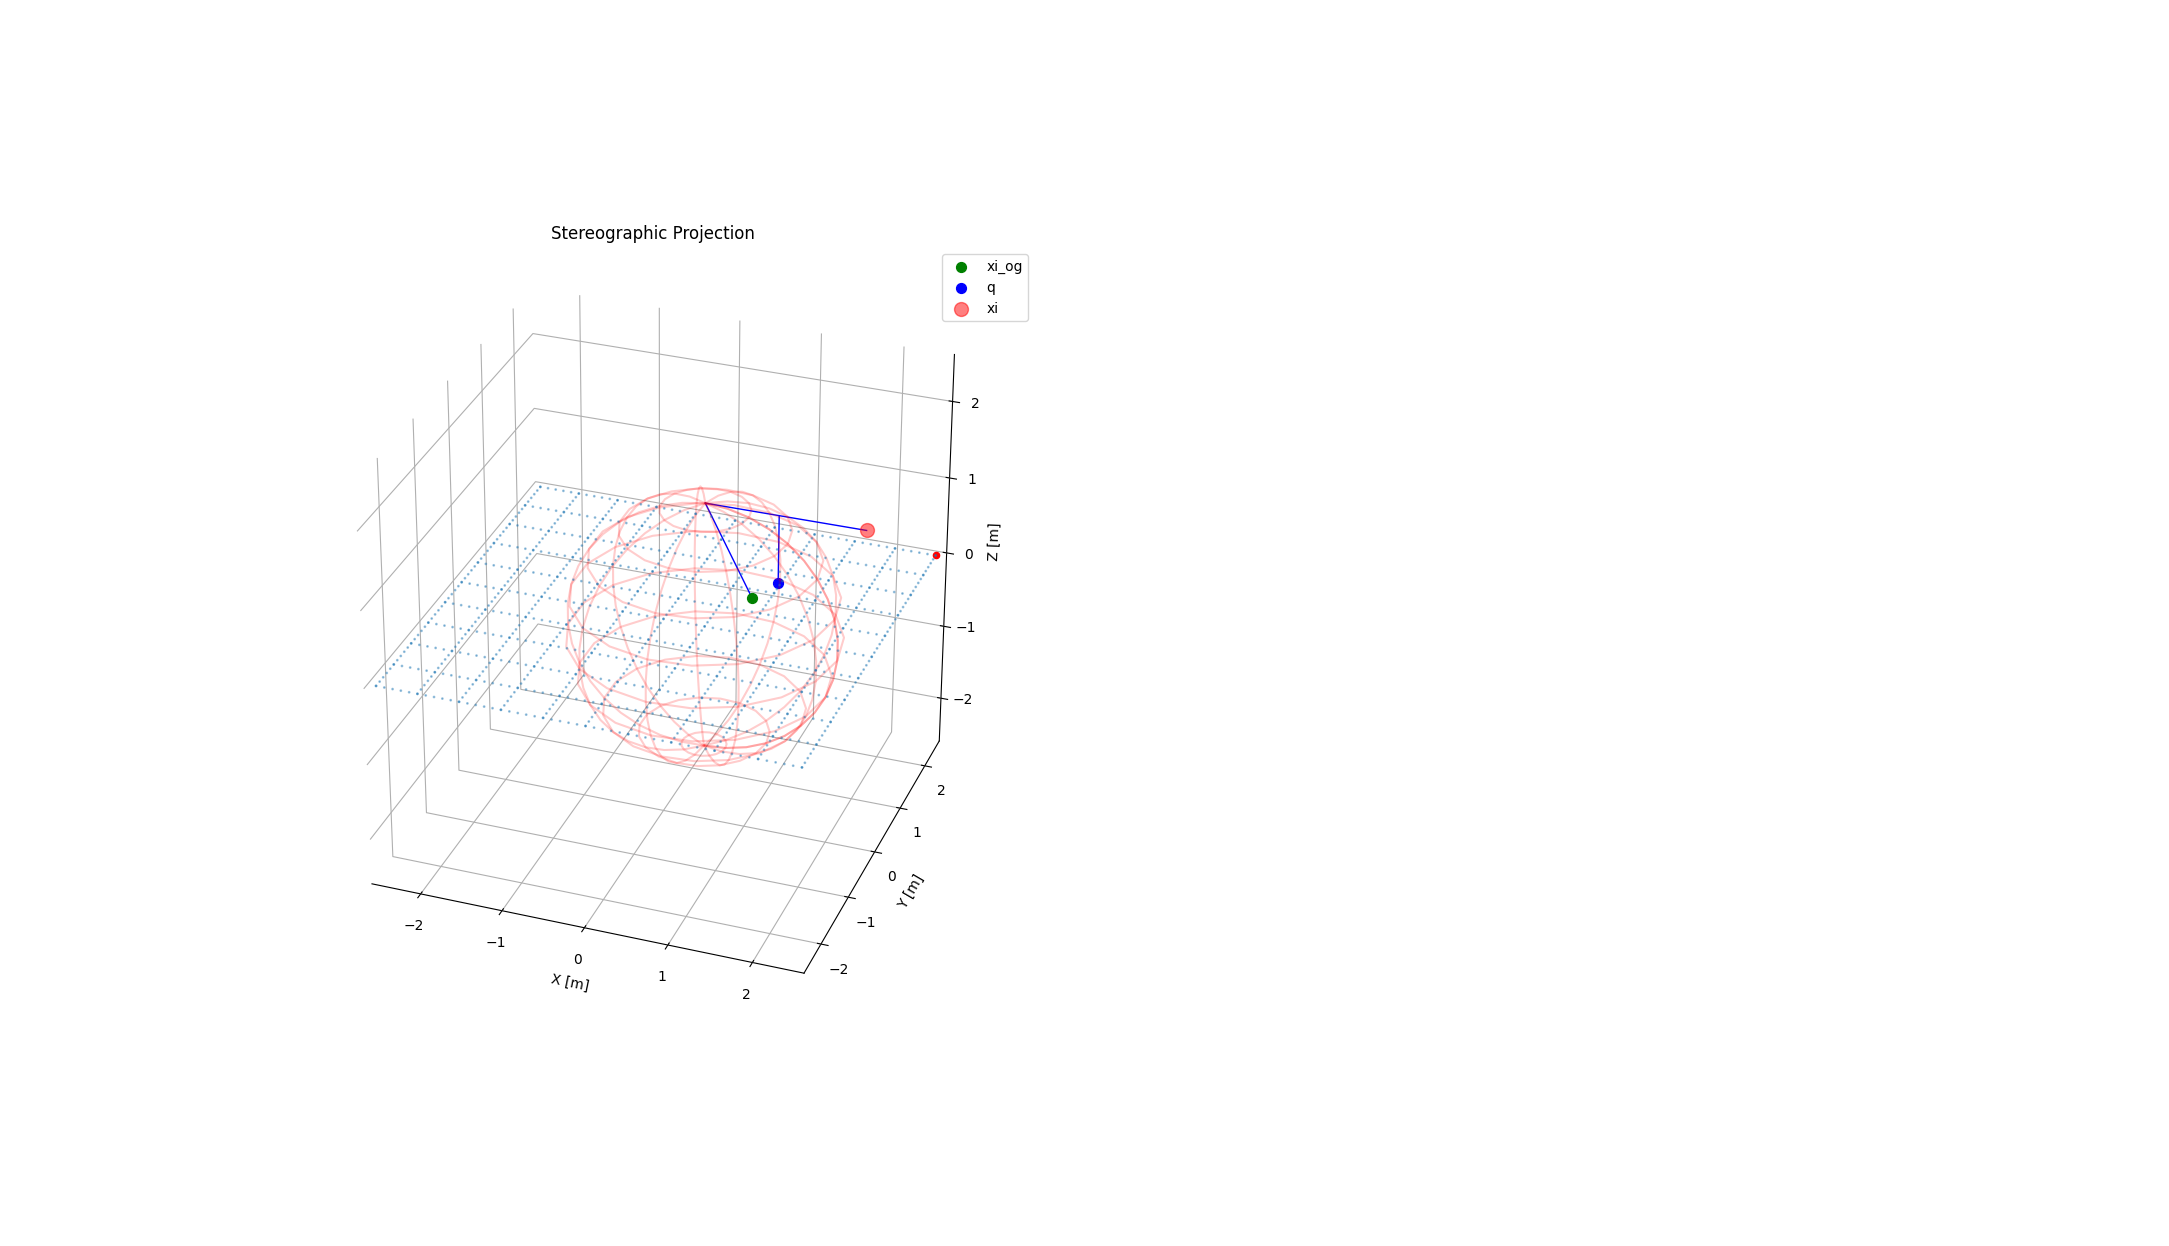

In [45]:
def f_B(xi, o_i, r_i):
    """Projection from n-dim state x to n-dim closed ball.

    Args:
        x (_type_): _description_
        center (_type_): center of sphere
    """
    xi_rel = xi - o_i # Point relative to sphere

    # print("o_i:", o_i)
    # print("r_i:", r_i)
    # print("xi:", xi)
    # print("xi_rel:", xi_rel)
    # print(np.linalg.norm(xi_rel)**2)
    
    return o_i + xi_rel * ((2 * r_i**2) / ( np.linalg.norm(xi_rel)**2 + r_i**2))

def inverse_f_B(q_i, o_i, r_i):
    """Local inverse of f_B(x)

    Args:
        q_i (np.array): waypoint i
        o_i (np.array): center of sphere i
        r_i (float): radius of sphere i
    """
    # q_i_ = q_i.flatten()
    # o_i_ = o_i.flatten()
    # v_i = q_i_ - o_i_
    v_i = q_i - o_i

    b = r_i - np.sqrt(r_i**2 - np.linalg.norm(v_i)**2) # q has to be inside the sphere

    xi_i = o_i + v_i * (r_i / b ) 
    return xi_i

r_i = 1.6 # Sphere radius
o_i_2d = np.array([[0.5], [0.0]]) # Sphere center
o_i_3d = np.vstack((o_i_2d, [0.0]))# Sphere center

sph = SingleSphere(o_i_3d, r_i, color=[1, 0, 0], alpha = 0.2) 

xi_og = np.array([[0.8], [0.8]]) 
xi_og_3d = np.vstack((xi_og, [0.0]))

q = f_B(xi_og, o_i_2d, sph.radius)
xi = inverse_f_B(q, o_i_2d, sph.radius)

print("=== Original point ===")
print("xi_og: ", xi_og)
print("=== Projected point ===")
print("f_b(x) = ", q)
print("=== Original point from local inverse ===")
print("inv(f_b(x)) = xi = ", xi)

#####
# Plotting
#####
clearAllPlots()

fig = plt.figure(0, figsize=(6, 6))
ax = make_3d_axis(1, 121, unit="m")
ax.set_title("Stereographic Projection")
ax.view_init(elev=30, azim=-70)

# Plot sphere
plotSingleSphere(ax, sph)

# Plot original n-dim point (xi)
plot2DPoint(ax, xi_og, 'g', s=50, a=1.0, label='xi_og') # Green 

# Plot orthographic projected point (q)
plot2DPoint(ax, q, 'b', label='q') # Blue

# Plot inverse-projected point
plot2DPoint(ax, xi, 'r', s=100, a=0.5, label='xi') # Red

# # Plot up vector to sphere from q (constrained point)
q_3d = np.vstack((q, [0.0]))
h = np.sqrt(sph.radius**2 - np.linalg.norm(q - o_i_2d)**2 )
proj_up_q = q_3d + np.array([[0], [0], [h]]) 
plotLine(ax, q_3d.transpose().flatten(), proj_up_q.transpose().flatten(), linewidth=1.0)

# Plot north vector from center of circle
sph_north_pole =  np.vstack((o_i_2d, [sph.radius])) 
plotLine(ax, xi_og_3d.transpose().flatten(), sph_north_pole.transpose().flatten(), linewidth=1.0)

# Plot line from xi to north of circle
xi_3d =  np.vstack((xi, [0.0])) 
plotLine(ax, xi_3d.transpose().flatten(), sph_north_pole.transpose().flatten(), linewidth=1.0)

# # Plot up vector to sphere from q
# q_3d = np.vstack((q, [0.0]))
# h = np.sqrt(sph.radius**2 - np.linalg.norm(q - o_i_2d)**2 )
# proj_up_q = np.array([[0], [0], [h]]) 
# plotVector(ax, q_3d.transpose().flatten(), proj_up_q.transpose().flatten(), ax_s=0.1)

# Plot north vector
# dir_vec =  np.vstack((o_i_2d, [sph.radius])) - xi_og_3d
# plotVector(ax, xi_og_3d.transpose().flatten(), dir_vec.transpose().flatten(), ax_s=0.1)

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_zlim(-2.5, 2.5)

# Plot world grid
world_grid = make_world_grid(n_lines=51, n_points_per_line=11, xlim = (-2.5, 2.5), ylim = (-2.5, 2.5),)
ax.scatter(
    world_grid[:, 0], world_grid[:, 1], world_grid[:, 2], s=1, alpha=0.4)
ax.scatter(world_grid[-1, 0], world_grid[-1, 1], world_grid[-1, 2], color="r")

plt.legend()

plt.show()

In [41]:
# # Sphere to sphere intersection
# def getIntersectionCenter(ax, s_a, s_b):
#     dir_vec = s_b.center - s_a.center
#     dist_centroids = np.linalg.norm(dir_vec)
#     dist_intersect = (s_a.radius**2 + dist_centroids**2 - s_b.radius**2) / (2*dist_centroids)

#     pt_intersect = s_a.center + (dist_intersect/dist_centroids) * dir_vec

#     plotVector(ax, s_a.center.transpose().flatten(), dir_vec.transpose().flatten())

#     return pt_intersect 

# o_a = np.array([[0.0], [0.0], [0.0]]) # Sphere center
# r_a = 1.0 # Sphere radius

# o_b = np.array([[0.0], [2.0], [0.0]]) # Sphere center
# r_b = 2.0 # Sphere radius

# s_a = SingleSphere(o_a, r_a, color=[1, 0, 0], alpha = 0.2) 
# s_b = SingleSphere(o_b, r_b, color=[0, 1, 0], alpha = 0.2) 

# #####
# # Plotting
# #####

# clearAllPlots()

# fig = plt.figure(0, figsize=(10, 10))
# ax = make_3d_axis(1, 121, unit="m")
# ax.set_title("Stereographic Projection")
# ax.view_init(elev=30, azim=-70)

# plotSingleSphere(ax, s_a)
# plotSingleSphere(ax, s_b)

# intersect_pt = getIntersectionCenter(ax, s_a, s_b)
# plot3DPoint(ax, intersect_pt, 'r') # Red

# ax.set_xlim(-2.5, 2.5)
# ax.set_ylim(-2.5, 2.5)
# ax.set_zlim(-2.5, 2.5)

# plt.show()

# References:
[1] Geometrically Constrained Trajectory Optimization for Multicopters